#### 设置工作区

In [1]:
# 设置工作区
import os
# 设置工作目录为项目根目录
os.chdir('..')

#### 导入Adult数据集并用dataframe查看格式

In [2]:
from ucimlrepo import fetch_ucirepo 
import unibox
import json
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

pd.DataFrame(adult.variables)

/home/ubuntu/Network-Embedding-Algorithm/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [3]:
X = adult.data.features 
df_X = pd.DataFrame(X)
df_X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


#### 取1000个试试水

In [4]:
# 取1000条数据
df_X = df_X[:1000]
df_X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,112840,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
996,45,Private,89325,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States
997,48,Federal-gov,33109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,58,United-States
998,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States


In [5]:
# 制定映射规则，全都转为数值型
# 只取age, education-num, capital-gain, capital-loss, hours-per-week列
input_X = df_X.iloc[:, [0, 4, 10, 11, 12]]
# input_X转为ndarray
input_X = input_X.values
input_X

array([[   39,    13,  2174,     0,    40],
       [   50,    13,     0,     0,    13],
       [   38,     9,     0,     0,    40],
       ...,
       [   48,    13,     0,     0,    58],
       [   40,    10,  2580,     0,    40],
       [   39,    13, 15024,     0,    50]])

In [6]:
y = adult.data.targets
df_y = y['income'].str.strip().str.rstrip('.')
# 制定df_y的映射规则
map = {'<=50K': 0, 
       '>50K': 1}
input_y = df_y.map(map).values
input_y = input_y[:1000]
input_y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

#### 根据数据集特征，创建类，并构建邻接矩阵

In [7]:
nodes = []
index = 0
from src.AdultNode import Node, Graph

for df, y in zip(input_X, input_y):
    node = Node(df, y, index)
    nodes.append(node)
    index += 1

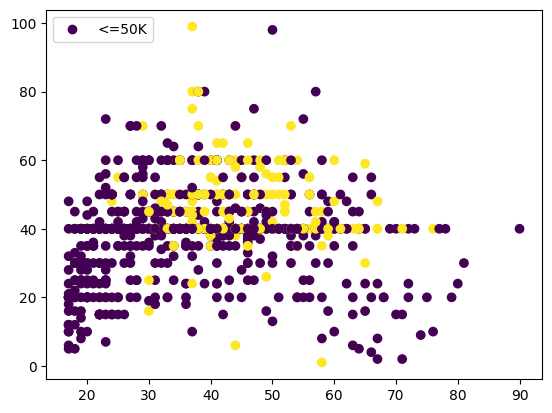

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
# age, education-num, capital-gain, capital-loss, hours-per-week
plt.scatter(input_X[:, 0], input_X[:, 4], c=input_y)
# 图例
plt.legend(['<=50K', '>50K'], loc='upper left')

#### 构建图

In [ ]:
graph = Graph(nodes, 5)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()

from src.deepwalk import deepwalk
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx, walk_length = 600, num_walks= 1200, dim = 32)
embeddings

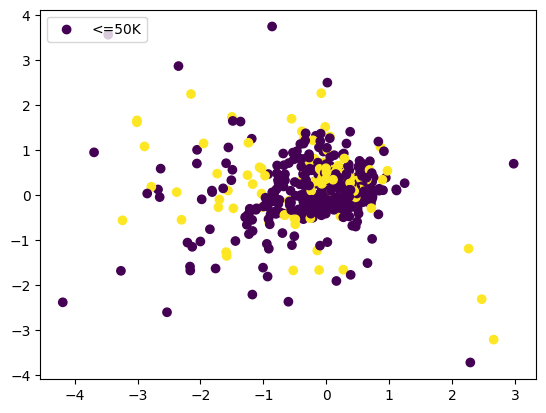

In [15]:
# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if(embedding is not None)]
y = [embedding[1] for embedding in list(embeddings.values()) if(embedding is not None)]

label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)
plt.legend(['<=50K', '>50K'], loc='upper left')

# 显示图形
plt.show()